In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science I.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 1.21 s, sys: 354 ms, total: 1.57 s
Wall time: 4.78 s


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/9/2023 18:05:03,kadekaditya977@gmail.com,I Kadek Aditya Pramana,1,VII I,I Ketut Adhitya,karena orangnya asik dan suka bercanda,I Ketut Adhitya,"orangnya konyol, tapi asik",Ni Komang Sri Mas Marini,orgnya bikin saya tidak nyaman,I Putu Raditya Pratama,"paling susah di atur, paling sering ribut di k..."
1,5/8/2023 17:47:34,baguswiradit@gmail.com,I Kadek Bagus Wiraditya,2,VII I,I Made Agus Ganendra Wisnu Pradana,Seru dan tidak pernah membawa fisik,I Ketut Adhitya,Asik,I Komang Adi Wiguna,"Saya duduk dengan dia,dan dari hari pertama sy...",I Komang Adi Wiguna,Sya lagi” memilih Komang adi Wiguna Karna cuma...
2,6/23/2023 20:17:19,nikomangsulastriasih@gmail.com,I Kadek Disma Natya Putra,3,VII I,I Kadek Aditya Pramana,dia baik,I Ketut Adhitya,dia baik,I Made Agus Ganendra Wisnu Pradana,suka jahil,I Komang Adi Wiguna,nakal
3,5/8/2023 18:06:57,nyomibali2019@gmail.com,I Kadek Dwi Yoga Putra,4,VII I,Ni Kadek Fibra Lusiana,Karena dia pintar tidak berisik saat pelajaran...,Ni Putu Silvia Dewi,"Karena di kalem,pintar dan baik",I Putu Raditya Pratama,Karena ketika belajar itu dia ribut sama teman...,Ni Kadek Diah Puspita Dewi,Karena dia paling rusuh di kelas apalagi soal ...
4,5/15/2023 11:01:05,tutadhitya@gmail.com,I Ketut Adhitya,5,VII I,I Kadek Aditya Pramana,Karena dia teman baik saya waktu kecil sampai ...,I Nyoman Arya Pradnyana,Karena dia teman baik saya waktu kecil sampai ...,I Ketut Heriawan Antarayasa,Ketika saya sedang belajar di kelas dia mengga...,I Komang Adi Wiguna,Ketika saya di kelas dia sering meledek saya d...
5,6/23/2023 20:19:55,nikomangsulastriasih@gmail.com,I Ketut Heriawan Antarayasa,6,VII I,Ni Komang Marita Apsari,dia baik,I Kadek Disma Natya Putra,karena seing membantu,I Komang Agus Andika Jaya,sering membully,Ida Bagus Gede Putra Adnyana,sering memukul
6,6/23/2023 20:22:02,nikomangsulastriasih@gmail.com,I Komang Adi Wiguna,7,VII I,I Putu Raditya Pratama,dia baik,Ida Bagus Gede Edgina Leo Permana,karena di ramah,Ida Bagus Gede Putra Adnyana,suka mengejek,I Made Dude Artha Santika,suka membully nama ortu
7,6/23/2023 20:23:46,nikomangsulastriasih@gmail.com,I Komang Agus Andika Jaya,8,VII I,Ni Kadek Jesika Putri,dia baik dan cantik,I Made Dude Artha Santika,dia baik,Ni Kadek Diah Puspita Dewi,galak,I Kadek Disma Natya Putra,karena sering membuat kesal
8,5/12/2023 0:37:13,agusganendra74@gmail.com,I Made Agus Ganendra Wisnu Pradana,9,VII I,I Kadek Bagus Wiraditya,Asik,I Kadek Bagus Wiraditya,Asik,Ni Wayan Egi Cahyani Dewi,Nakal,I Ketut Heriawan Antarayasa,Nakal
9,5/16/2023 18:36:30,madeartha441@gmail.com,I Made Dude Artha Santika,10,VII I,I Komang Agus Andika Jaya,Kerena saya sudah dari kecil berteman dengan d...,Ida Bagus Gede Putra Adnyana,Kerena saya suka sifat nya,Kadek Andika Pradipta Putra,Kerena tidak terlalu akrab\n,Ni Kadek Putri Anggraeni,Kerena saya tidak suka\n


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0   5/9/2023 18:05:03        kadekaditya977@gmail.com   
1   5/8/2023 17:47:34          baguswiradit@gmail.com   
2  6/23/2023 20:17:19  nikomangsulastriasih@gmail.com   
3   5/8/2023 18:06:57         nyomibali2019@gmail.com   
4  5/15/2023 11:01:05            tutadhitya@gmail.com   

                NAMA LENGKAP  NO ABSEN  KELAS  \
0     I Kadek Aditya Pramana         1  VII I   
1    I Kadek Bagus Wiraditya         2  VII I   
2  I Kadek Disma Natya Putra         3  VII I   
3     I Kadek Dwi Yoga Putra         4  VII I   
4            I Ketut Adhitya         5  VII I   

  1. Teman anda yang paling anda sukai di kelas  \
0                               I Ketut Adhitya   
1            I Made Agus Ganendra Wisnu Pradana   
2                        I Kadek Aditya Pramana   
3                        Ni Kadek Fibra Lusiana   
4                        I Kadek Aditya Pramana   

                                              Alasan  \

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 3.59 ms, sys: 1.86 ms, total: 5.45 ms
Wall time: 14.3 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 953 µs, sys: 166 µs, total: 1.12 ms
Wall time: 1.08 ms


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data I.csv', index=False)

CPU times: user 8.06 ms, sys: 7.71 ms, total: 15.8 ms
Wall time: 32 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 861 µs, sys: 1.03 ms, total: 1.89 ms
Wall time: 914 µs


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 394 µs, sys: 81 µs, total: 475 µs
Wall time: 492 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 13.1 ms, sys: 1.53 ms, total: 14.6 ms
Wall time: 34.5 ms


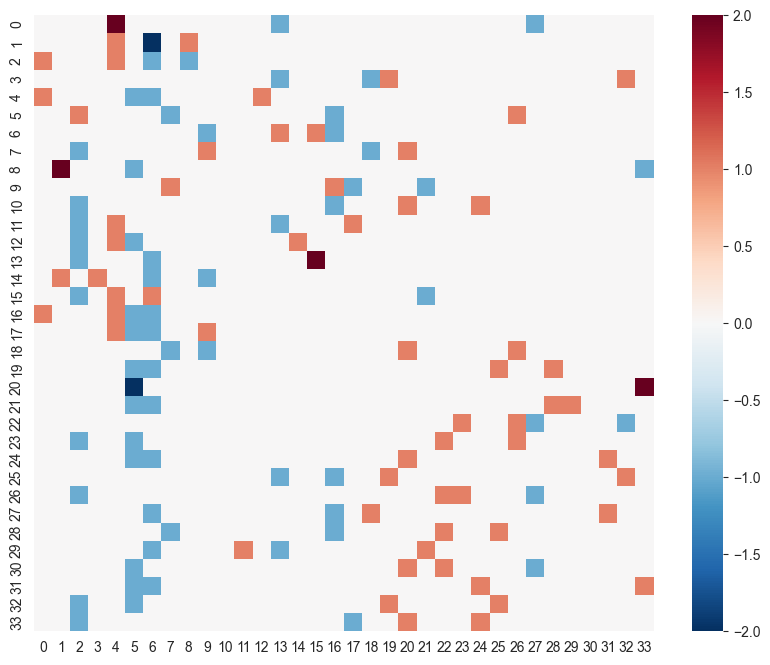

CPU times: user 5.05 s, sys: 319 ms, total: 5.37 s
Wall time: 19.6 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 5.76 ms, sys: 4.77 ms, total: 10.5 ms
Wall time: 17.4 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

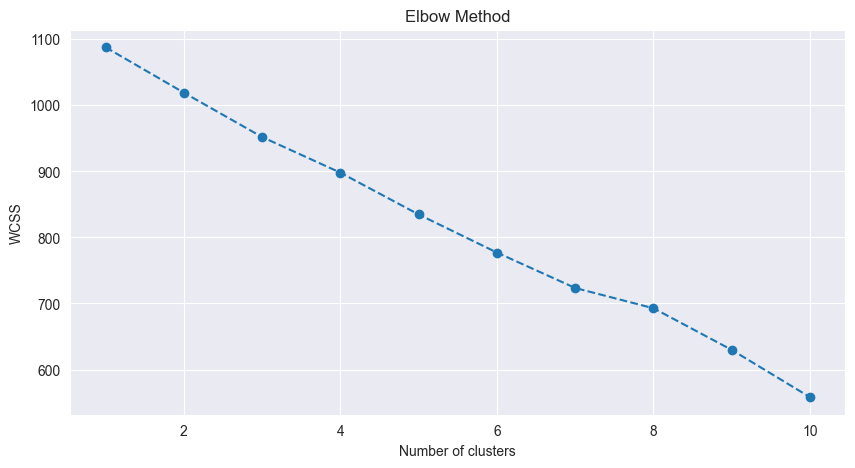

CPU times: user 4.74 s, sys: 522 ms, total: 5.26 s
Wall time: 7.97 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 178 ms, sys: 27.5 ms, total: 205 ms
Wall time: 171 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time


print(len(df))
print(len(clustered_students))


34
34
CPU times: user 2.87 ms, sys: 398 µs, total: 3.27 ms
Wall time: 804 µs


In [14]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0   5/9/2023 18:05:03        kadekaditya977@gmail.com   
1   5/8/2023 17:47:34          baguswiradit@gmail.com   
2  6/23/2023 20:17:19  nikomangsulastriasih@gmail.com   
3   5/8/2023 18:06:57         nyomibali2019@gmail.com   
4  5/15/2023 11:01:05            tutadhitya@gmail.com   

                NAMA LENGKAP  NO ABSEN  KELAS  \
0     I Kadek Aditya Pramana         1  VII I   
1    I Kadek Bagus Wiraditya         2  VII I   
2  I Kadek Disma Natya Putra         3  VII I   
3     I Kadek Dwi Yoga Putra         4  VII I   
4            I Ketut Adhitya         5  VII I   

  1. Teman anda yang paling anda sukai di kelas  \
0                               I Ketut Adhitya   
1            I Made Agus Ganendra Wisnu Pradana   
2                        I Kadek Aditya Pramana   
3                        Ni Kadek Fibra Lusiana   
4                        I Kadek Aditya Pramana   

                                              Alasan  \

In [15]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



34
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [16]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 372 µs, sys: 60 µs, total: 432 µs
Wall time: 413 µs


In [17]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                   Email Address  \
0    5/9/2023 18:05:03        kadekaditya977@gmail.com   
2   6/23/2023 20:17:19  nikomangsulastriasih@gmail.com   
3    5/8/2023 18:06:57         nyomibali2019@gmail.com   
7   6/23/2023 20:23:46  nikomangsulastriasih@gmail.com   
8    5/12/2023 0:37:13        agusganendra74@gmail.com   
9   5/16/2023 18:36:30          madeartha441@gmail.com   
10   5/9/2023 19:38:05           joniarta452@gmail.com   
11  6/23/2023 20:26:32  nikomangsulastriasih@gmail.com   
12   5/16/2023 7:13:41       aryapradnyana13@gmail.com   
15   5/9/2023 17:52:15            gusleoo123@gmail.com   
16  6/23/2023 20:27:54  nikomangsulastriasih@gmail.com   
17   5/8/2023 22:37:15         andikakadek90@gmail.com   
20  5/13/2023 23:49:33            kdekjesika@gmail.com   
22   5/8/2023 17:47:32           dyawidyaaaa@gmail.com   
23  5/10/2023 17:50:24      kadekwinda332211@gmail.com   
25  5/11/2023 21:26:49             intandwkm@gmail.com   
26  5/13/2023 

In [18]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 88 µs, sys: 66 µs, total: 154 µs
Wall time: 165 µs


In [19]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 18.9 ms, sys: 4.65 ms, total: 23.6 ms
Wall time: 61.9 ms


In [20]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 37.6 ms, sys: 9.77 ms, total: 47.3 ms
Wall time: 129 ms


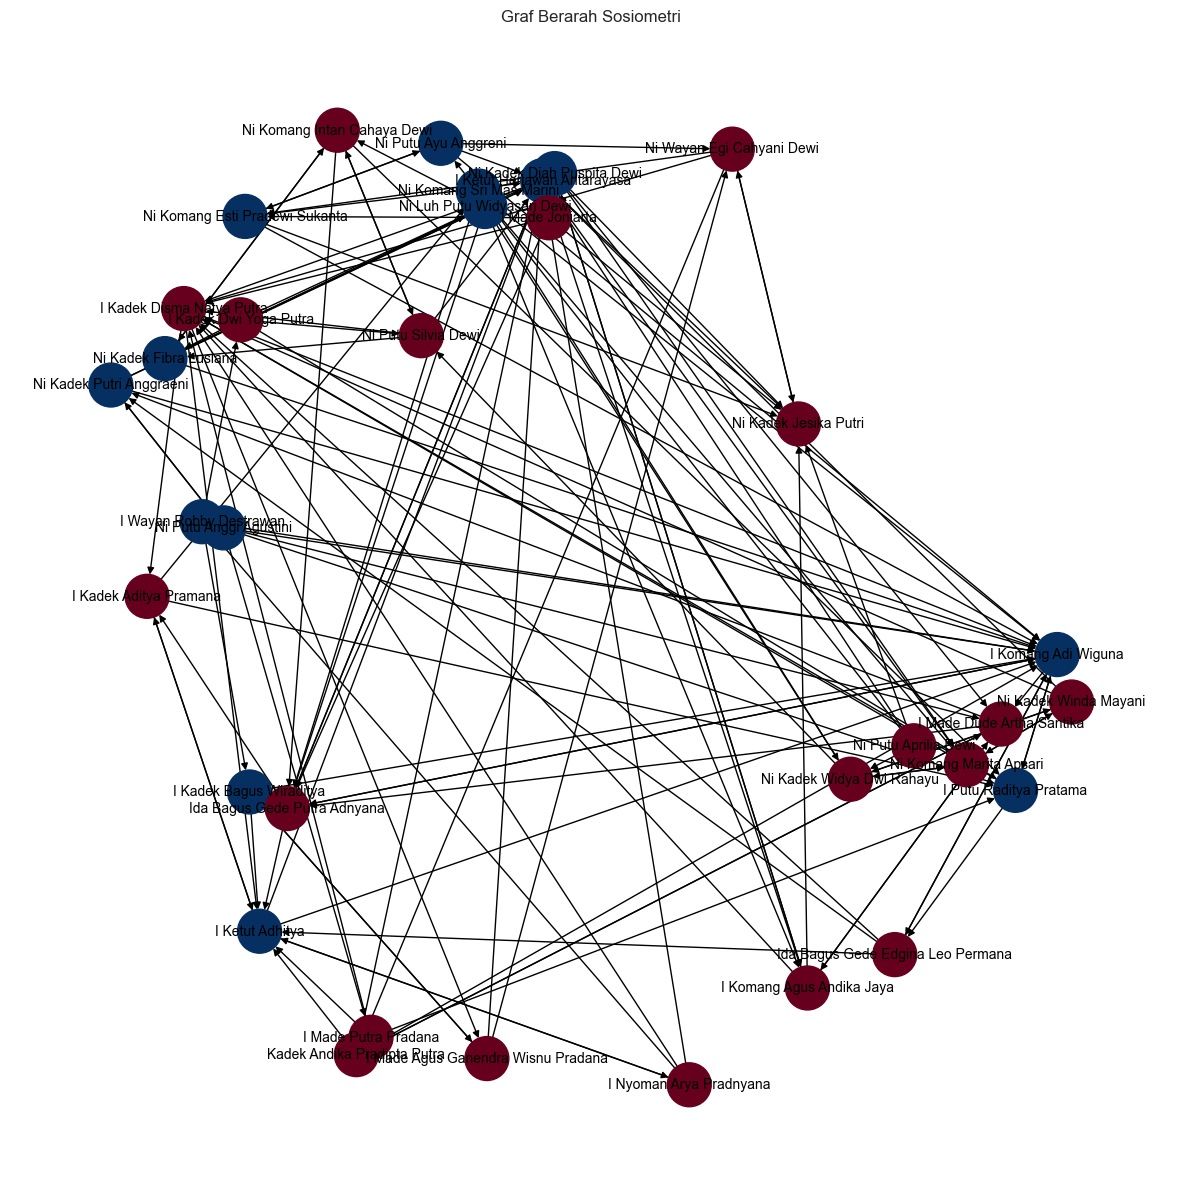

CPU times: user 5.42 s, sys: 390 ms, total: 5.81 s
Wall time: 12.8 s


In [21]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [22]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 1.23 ms, sys: 628 µs, total: 1.86 ms
Wall time: 1.43 ms


In [23]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 7.13 ms, sys: 1.12 ms, total: 8.25 ms
Wall time: 7.91 ms


In [24]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp          Email Address                 NAMA LENGKAP  \
4   5/15/2023 11:01:05   tutadhitya@gmail.com              I Ketut Adhitya   
20  5/13/2023 23:49:33   kdekjesika@gmail.com        Ni Kadek Jesika Putri   
26  5/13/2023 13:53:32  joniarta452@gmail.com      Ni Komang Marita Apsari   
22   5/8/2023 17:47:32  dyawidyaaaa@gmail.com    Ni Kadek Widya Dwi Rahayu   
25  5/11/2023 21:26:49    intandwkm@gmail.com  Ni Komang Intan Cahaya Dewi   

    NO ABSEN  KELAS 1. Teman anda yang paling anda sukai di kelas  \
4          5  VII I                        I Kadek Aditya Pramana   
20        21  VII I                     Ni Wayan Egi Cahyani Dewi   
26        27  VII I                     Ni Kadek Widya Dwi Rahayu   
22        23  VII I                         Ni Kadek Winda Mayani   
25        26  VII I                        Ni Kadek Fibra Lusiana   

                                               Alasan  \
4   Karena dia teman b

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


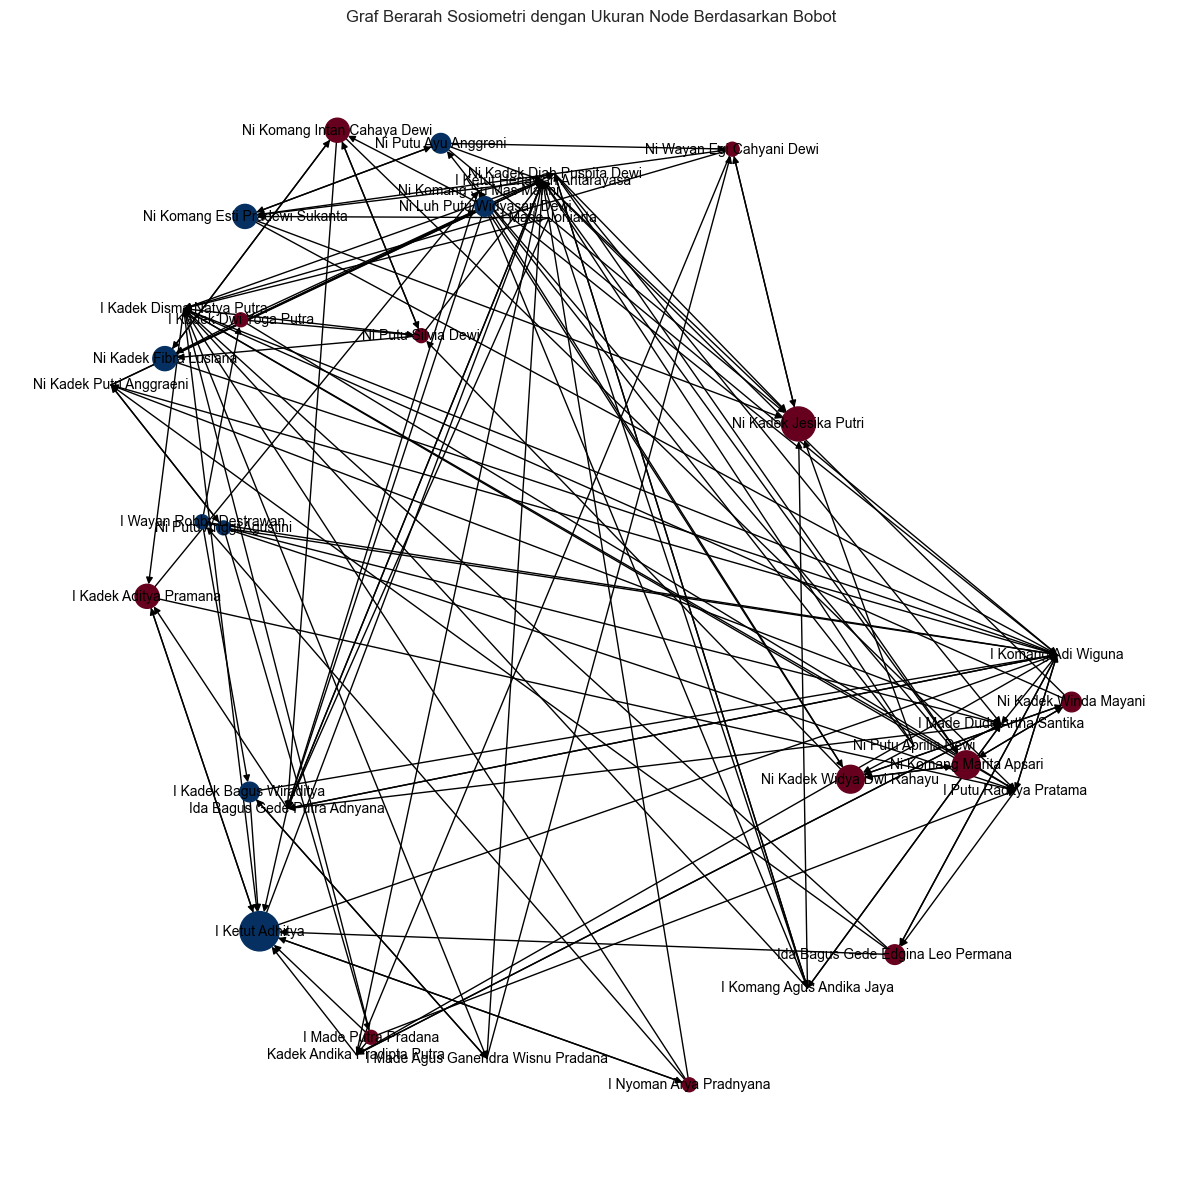

CPU times: user 3.76 s, sys: 222 ms, total: 3.98 s
Wall time: 7.86 s


In [25]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [26]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 22.2 µs


In [27]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 334 µs, sys: 2 µs, total: 336 µs
Wall time: 349 µs


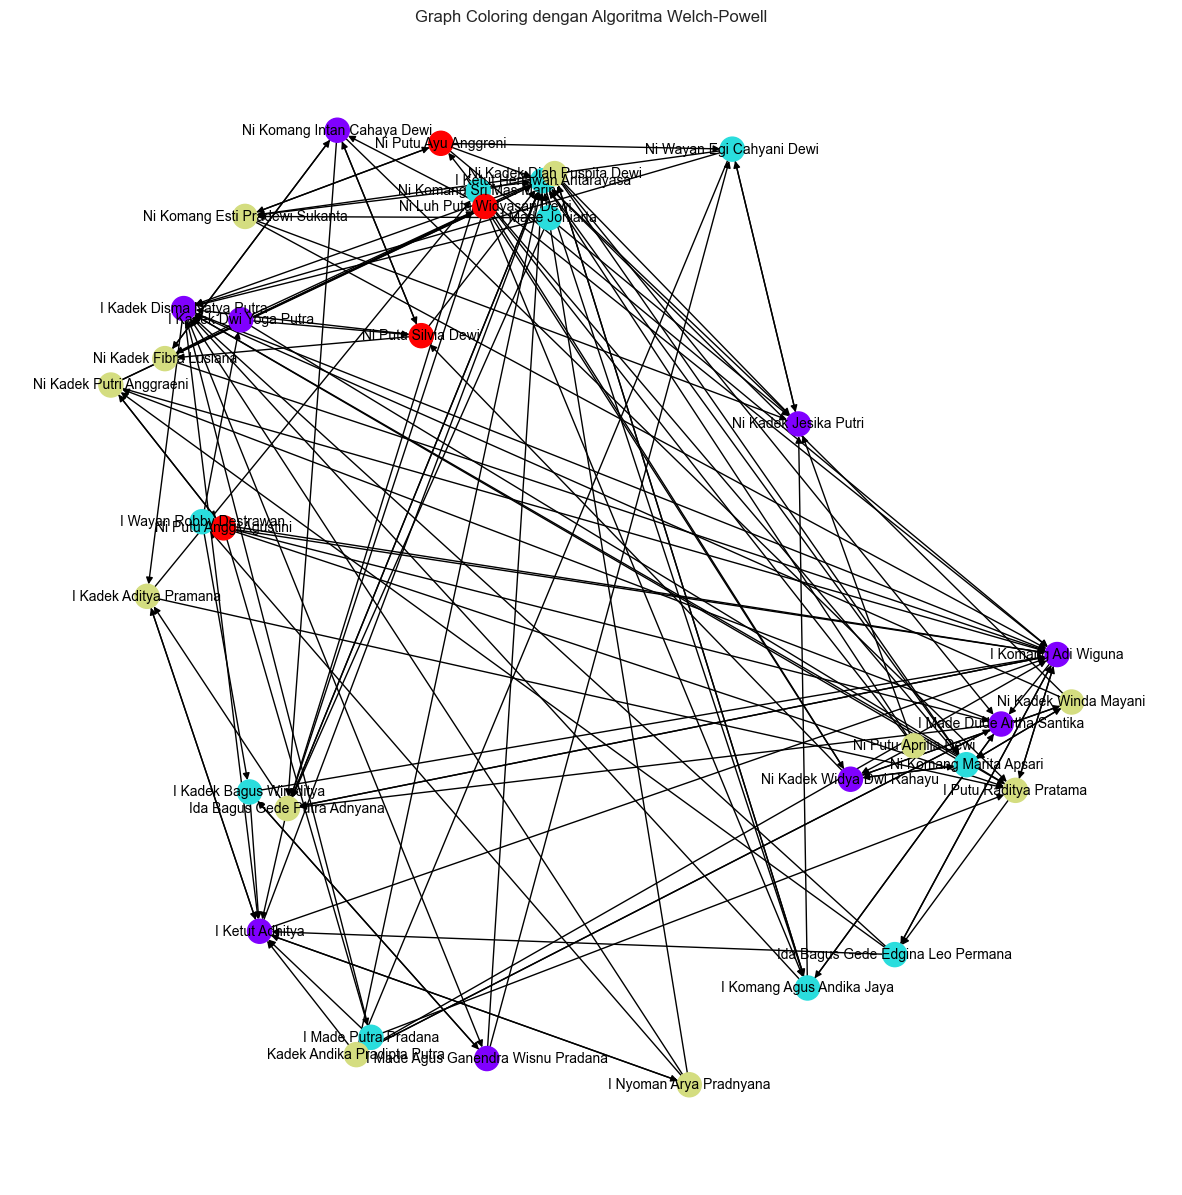

CPU times: user 4.51 s, sys: 329 ms, total: 4.84 s
Wall time: 8.36 s


In [28]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


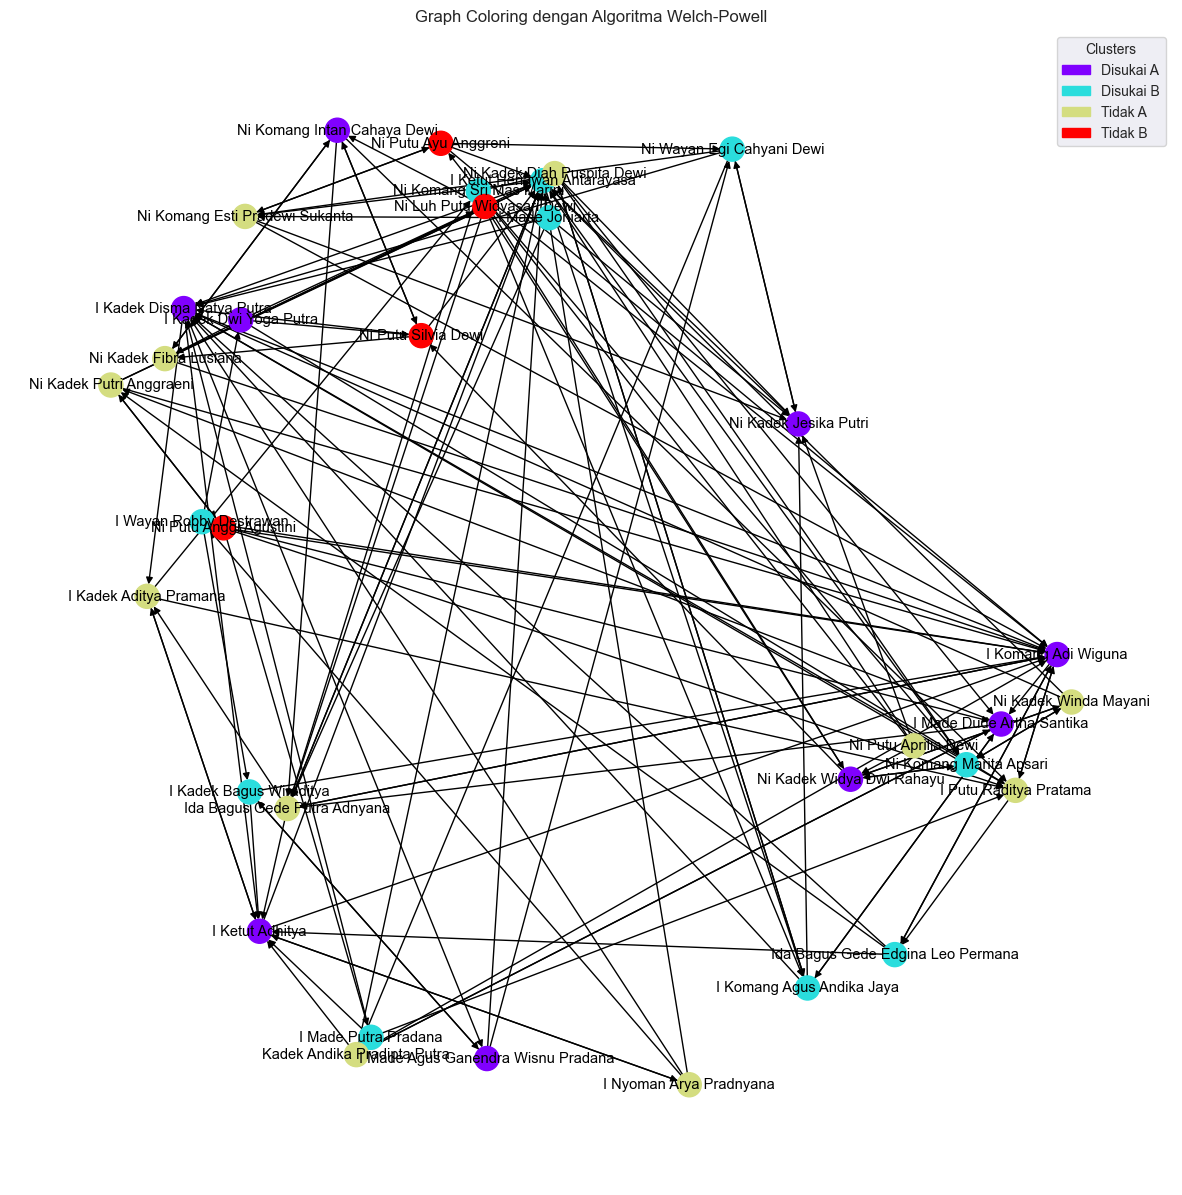

CPU times: user 9.64 s, sys: 634 ms, total: 10.3 s
Wall time: 19 s


In [29]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


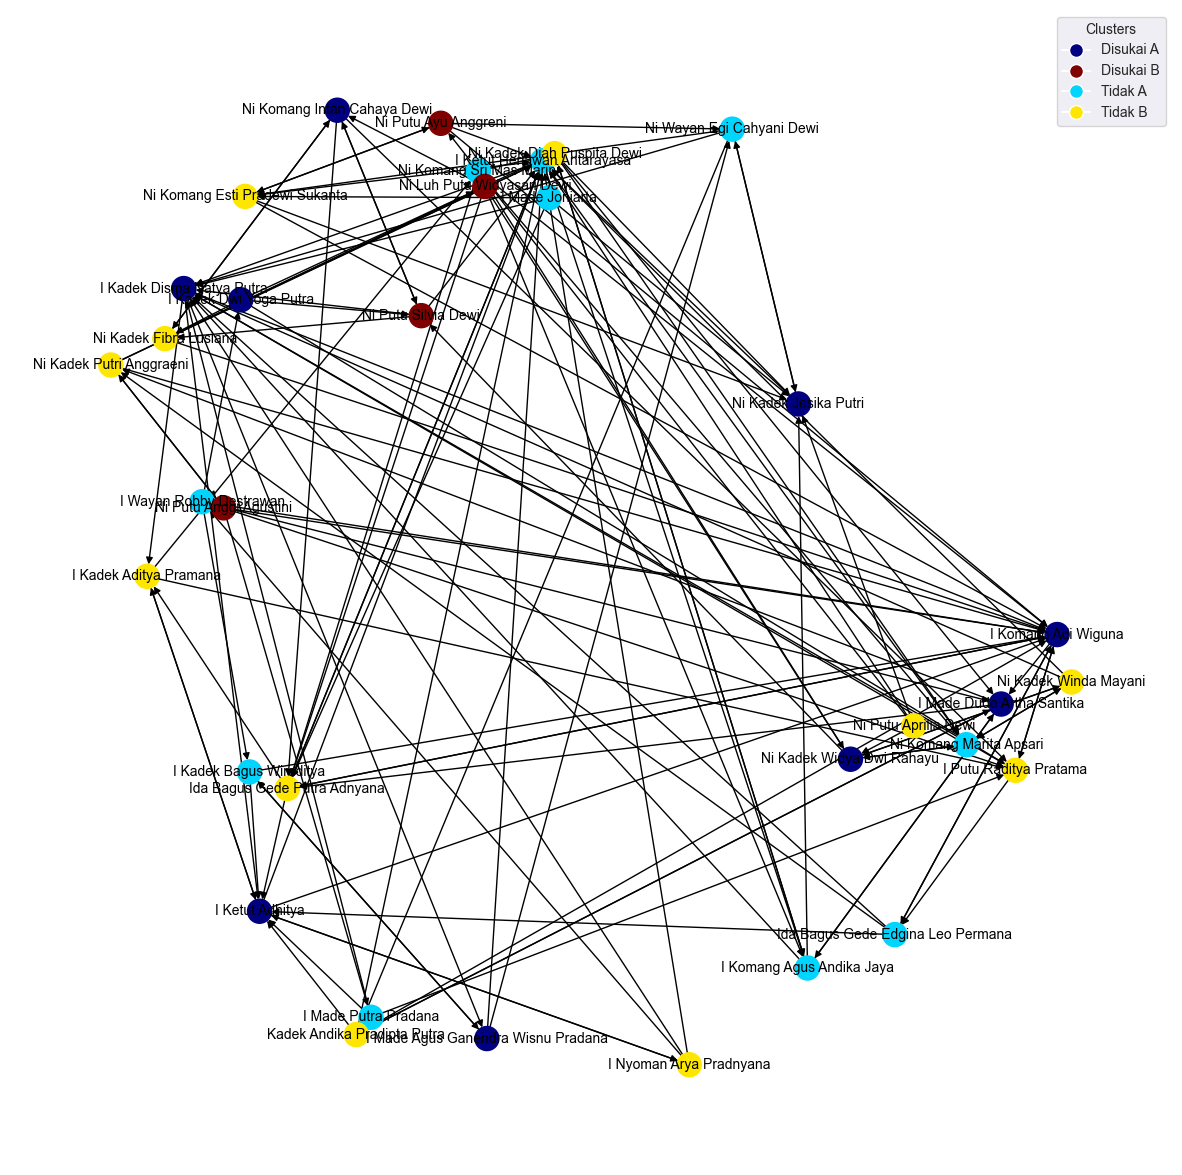

CPU times: user 7.72 s, sys: 298 ms, total: 8.02 s
Wall time: 12.7 s


In [30]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data I.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/9/2023 18:05:03,kadekaditya977@gmail.com,I Kadek Aditya Pramana,1,VII I,I Ketut Adhitya,karena orangnya asik dan suka bercanda,I Ketut Adhitya,"orangnya konyol, tapi asik",Ni Komang Sri Mas Marini,orgnya bikin saya tidak nyaman,I Putu Raditya Pratama,"paling susah di atur, paling sering ribut di k..."
1,5/8/2023 17:47:34,baguswiradit@gmail.com,I Kadek Bagus Wiraditya,2,VII I,I Made Agus Ganendra Wisnu Pradana,Seru dan tidak pernah membawa fisik,I Ketut Adhitya,Asik,I Komang Adi Wiguna,"Saya duduk dengan dia,dan dari hari pertama sy...",I Komang Adi Wiguna,Sya lagi” memilih Komang adi Wiguna Karna cuma...
2,6/23/2023 20:17:19,nikomangsulastriasih@gmail.com,I Kadek Disma Natya Putra,3,VII I,I Kadek Aditya Pramana,dia baik,I Ketut Adhitya,dia baik,I Made Agus Ganendra Wisnu Pradana,suka jahil,I Komang Adi Wiguna,nakal
3,5/8/2023 18:06:57,nyomibali2019@gmail.com,I Kadek Dwi Yoga Putra,4,VII I,Ni Kadek Fibra Lusiana,Karena dia pintar tidak berisik saat pelajaran...,Ni Putu Silvia Dewi,"Karena di kalem,pintar dan baik",I Putu Raditya Pratama,Karena ketika belajar itu dia ribut sama teman...,Ni Kadek Diah Puspita Dewi,Karena dia paling rusuh di kelas apalagi soal ...
4,5/15/2023 11:01:05,tutadhitya@gmail.com,I Ketut Adhitya,5,VII I,I Kadek Aditya Pramana,Karena dia teman baik saya waktu kecil sampai ...,I Nyoman Arya Pradnyana,Karena dia teman baik saya waktu kecil sampai ...,I Ketut Heriawan Antarayasa,Ketika saya sedang belajar di kelas dia mengga...,I Komang Adi Wiguna,Ketika saya di kelas dia sering meledek saya d...
5,6/23/2023 20:19:55,nikomangsulastriasih@gmail.com,I Ketut Heriawan Antarayasa,6,VII I,Ni Komang Marita Apsari,dia baik,I Kadek Disma Natya Putra,karena seing membantu,I Komang Agus Andika Jaya,sering membully,Ida Bagus Gede Putra Adnyana,sering memukul
6,6/23/2023 20:22:02,nikomangsulastriasih@gmail.com,I Komang Adi Wiguna,7,VII I,I Putu Raditya Pratama,dia baik,Ida Bagus Gede Edgina Leo Permana,karena di ramah,Ida Bagus Gede Putra Adnyana,suka mengejek,I Made Dude Artha Santika,suka membully nama ortu
7,6/23/2023 20:23:46,nikomangsulastriasih@gmail.com,I Komang Agus Andika Jaya,8,VII I,Ni Kadek Jesika Putri,dia baik dan cantik,I Made Dude Artha Santika,dia baik,Ni Kadek Diah Puspita Dewi,galak,I Kadek Disma Natya Putra,karena sering membuat kesal
8,5/12/2023 0:37:13,agusganendra74@gmail.com,I Made Agus Ganendra Wisnu Pradana,9,VII I,I Kadek Bagus Wiraditya,Asik,I Kadek Bagus Wiraditya,Asik,Ni Wayan Egi Cahyani Dewi,Nakal,I Ketut Heriawan Antarayasa,Nakal
9,5/16/2023 18:36:30,madeartha441@gmail.com,I Made Dude Artha Santika,10,VII I,I Komang Agus Andika Jaya,Kerena saya sudah dari kecil berteman dengan d...,Ida Bagus Gede Putra Adnyana,Kerena saya suka sifat nya,Kadek Andika Pradipta Putra,Kerena tidak terlalu akrab\n,Ni Kadek Putri Anggraeni,Kerena saya tidak suka\n


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,I Ketut Adhitya,9.0,I Komang Adi Wiguna,14.0
1,Ni Kadek Jesika Putri,6.0,I Ketut Heriawan Antarayasa,14.0
2,Ni Kadek Widya Dwi Rahayu,4.0,I Kadek Disma Natya Putra,10.0
3,Ni Komang Marita Apsari,4.0,Ida Bagus Gede Putra Adnyana,6.0
4,Ni Komang Esti Pradewi Sukanta,3.0,I Putu Raditya Pratama,5.0
5,Ni Wayan Egi Cahyani Dewi,3.0,Ni Komang Sri Mas Marini,4.0
6,Ida Bagus Gede Edgina Leo Permana,3.0,I Komang Agus Andika Jaya,3.0
7,Ni Komang Intan Cahaya Dewi,3.0,I Made Dude Artha Santika,3.0
8,I Kadek Aditya Pramana,3.0,Ni Kadek Diah Puspita Dewi,2.0
9,Ni Kadek Fibra Lusiana,3.0,Kadek Andika Pradipta Putra,2.0
